# Sentiment Analysis

In [20]:
import PyPDF2
import os
import re
from googletrans import Translator
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


In [ ]:
# Function to extract text from a single PDF file
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfFileReader(file)
        text = ""
        for page in range(reader.numPages):
            text += reader.getPage(page).extractText()
    return text

# Function to translate text from Russian to English
def translate_text_to_english(text, source_language='ru'):
    if not text:  # Checks if the text is None or empty
        return ""

    translator = Translator()
    try:
        translation = translator.translate(text, src=source_language, dest='en')
        return translation.text
    except Exception as e:
        print(f"Error during translation: {e}")
        return ""


# Function to preprocess the text
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # emoving extra spaces
    return text

In [ ]:
# Sentiment analysis function
def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    
    if compound_score >= 0.05:
        return "Positive", compound_score
    elif compound_score <= -0.05:
        return "Negative", compound_score
    else:
        return "Neutral", compound_score


# Placeholder for additional analysis function
def perform_additional_analysis(texts):
    # Implement additional analysis techniques
    pass

def read_pdfs_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith('.pdf'):
            path = os.path.join(directory, filename)
            russian_text = extract_text_from_pdf(path)
            print(f"Extracted text from {filename}: {russian_text[:100]}...")  # Print first 100 characters
            english_text = translate_text_to_english(russian_text)
            texts.append(english_text)
    return texts

In [ ]:
# Main execution for sentiment analysis
directory_path = "/home//dev/dev/research/GeospatialAnalysis/library"
texts = read_pdfs_from_directory(directory_path)
processed_texts = [preprocess_text(text) for text in texts]
sentiments = [analyze_sentiment(text) for text in processed_texts]

# Perform Sentiment Analysis
for sentiment in sentiments:
    print(f"Sentiment: {sentiment[0]}, Compound Score: {sentiment[1]}")

In [ ]:
import os
import re
import PyPDF2
from googletrans import Translator
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Function to extract text from a single PDF file
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfFileReader(file)
        text = ""
        for page in range(reader.numPages):
            text += reader.getPage(page).extractText()
    return text

# Function to preprocess the text
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Example: Removing extra spaces
    return text

# Sentiment analysis function using NLTK's VADER
def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    
    if compound_score >= 0.05:
        return "Positive", compound_score
    elif compound_score <= -0.05:
        return "Negative", compound_score
    else:
        return "Neutral", compound_score

# Function to translate text from Russian to English
def translate_text_to_english(text, source_language='ru'):
    if not text:  # Checks if the text is None or empty
        return ""
    translator = Translator()
    try:
        translation = translator.translate(text, src=source_language, dest='en')
        return translation.text
    except Exception as e:
        print(f"Error during translation: {e}")
        return ""

# Function to read and process all PDFs in a directory
def read_pdfs_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith('.pdf'):
            path = os.path.join(directory, filename)
            text = extract_text_from_pdf(path)
            texts.append(text)
    return texts

# Main execution
def main():
    directory_path = "/home/dev/dev/research/GeospatialAnalysis/library"
    texts = read_pdfs_from_directory(directory_path)
    processed_texts = [preprocess_text(text) for text in texts]
    sentiments = [analyze_sentiment(text) for text in processed_texts]

    # Translating texts after sentiment analysis
    translated_texts = [translate_text_to_english(text) for text in processed_texts]

    # Output results
    for sentiment, translated_text in zip(sentiments, translated_texts):
        print(f"Sentiment: {sentiment[0]}, Compound Score: {sentiment[1]}")
        print(f"Translated Text (Excerpt): {translated_text[:200]}...\n")  # Print first 200 characters of the translated text

if __name__ == "__main__":
    main()


# Spreadsheet Analysis

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/tmp/ipykernel_16811/2864552169.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Grade', y='Hours', hue='Year', ci=None)


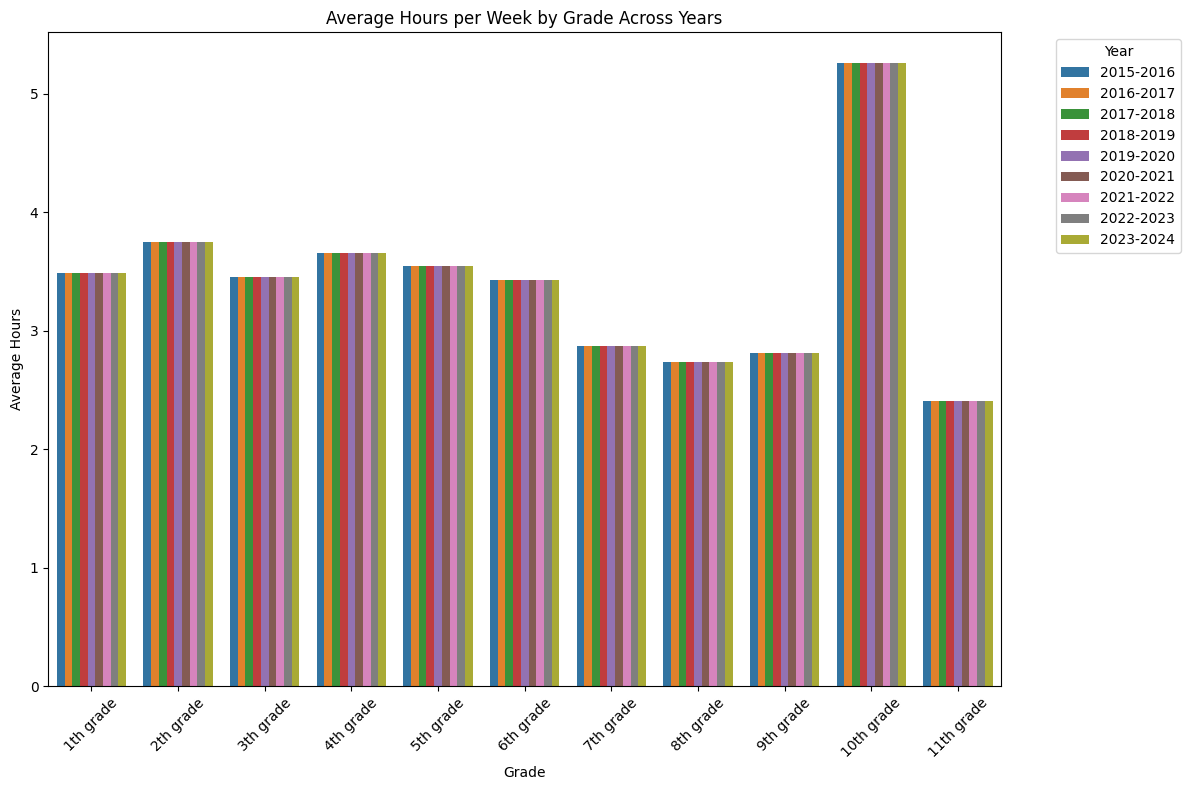

/tmp/ipykernel_16811/2864552169.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_specific, x='Hours', y='Course', ci=None)


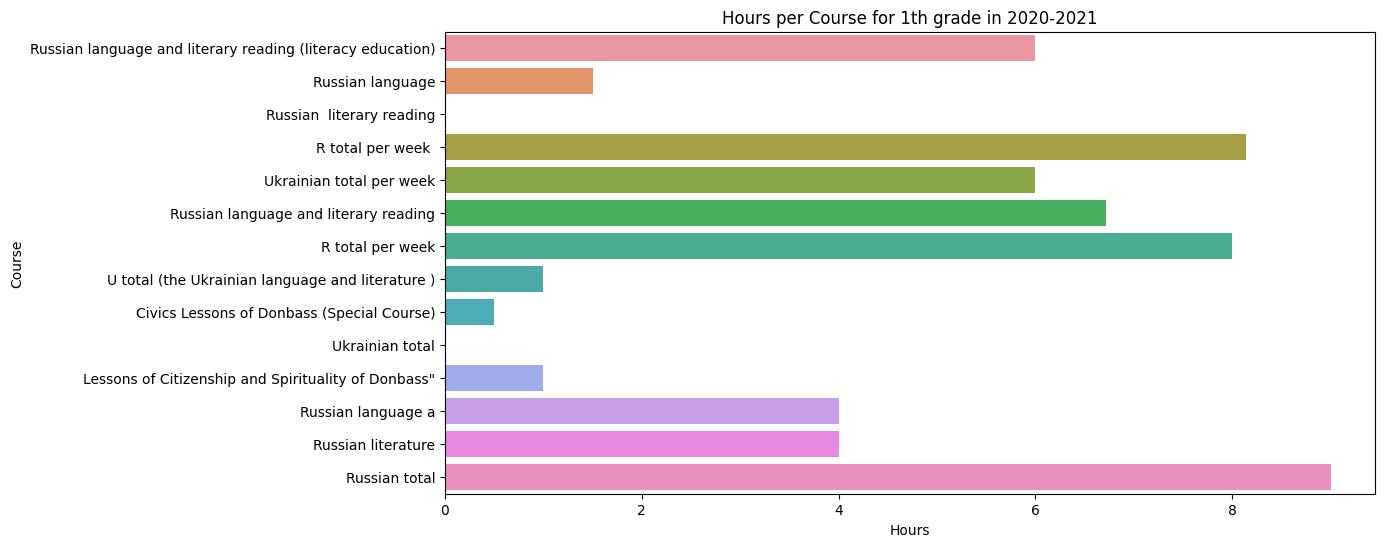

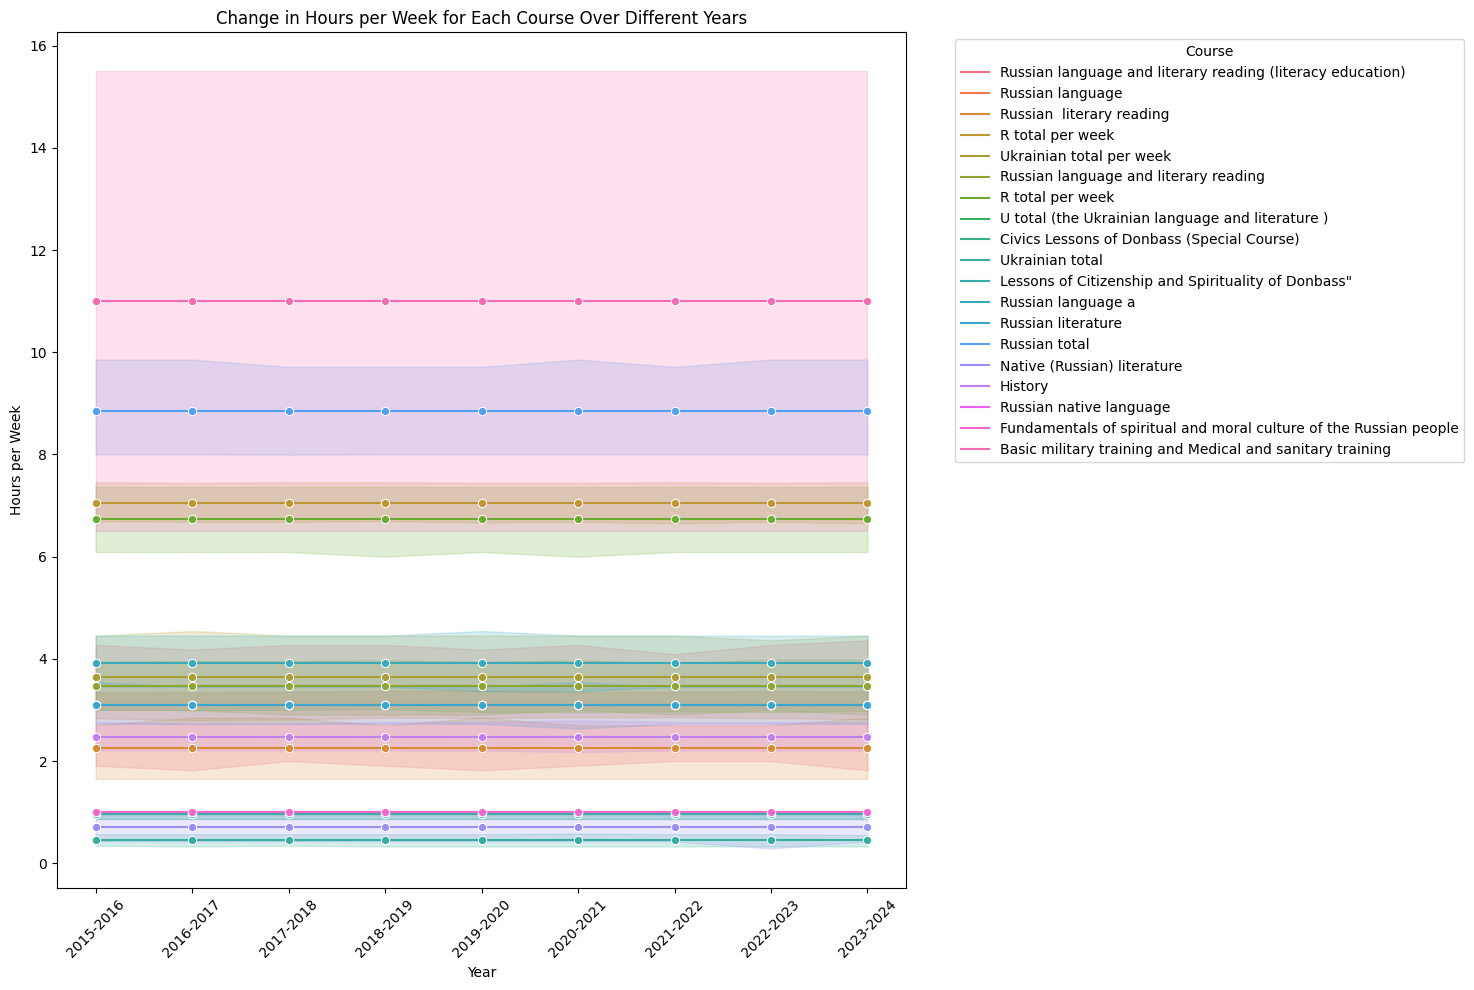

Descriptive Statistics by Year and Grade:
                       count      mean       std  min   25%  50%  75%   max
Year      Grade                                                           
2015-2016 10th grade   51.0  5.254902  6.578277  0.0  1.50  3.0  5.0  20.0
          11th grade   52.0  2.403846  1.431571  0.0  1.75  2.0  3.0   5.0
          1th grade    45.0  3.488889  3.552350  0.0  0.00  4.0  8.0   9.0
          2th grade    44.0  3.750000  3.027970  0.0  1.00  4.0  5.0   9.0
          3th grade    44.0  3.454545  2.905124  0.0  1.00  3.0  5.0   9.0
...                     ...       ...       ...  ...   ...  ...  ...   ...
2023-2024 5th grade    42.0  3.547619  2.804199  0.0  1.00  3.0  5.0  10.0
          6th grade    47.0  3.430851  2.787151  0.0  1.00  2.0  5.0  11.0
          7th grade    48.0  2.875000  2.089742  0.0  1.00  2.0  4.0   8.0
          8th grade    45.0  2.733333  1.838972  0.0  1.00  3.0  3.0   7.0
          9th grade    42.0  2.809524  1.953585  0.0  1.0

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def read_and_prepare_data(filepath):
    # Read the Excel file
    df = pd.read_excel(filepath)

    # The dataframe is expected to have columns 'Course', 'Grade', 'Hours', and 'Year'
    # Additional data preparation steps can be added here if necessary

    return df

def create_visualizations(df):
    # Visualization 1: Average hours per grade across years
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='Grade', y='Hours', hue='Year', ci=None)
    plt.title('Average Hours per Week by Grade Across Years')
    plt.xlabel('Grade')
    plt.ylabel('Average Hours')
    plt.xticks(rotation=45)
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Visualization 2: Hours per course for a specific year and grade
    specific_year = '2020-2021'  # Change this to the year of interest
    specific_grade = '1th grade'  # Change this to the grade of interest
    df_specific = df[(df['Year'] == specific_year) & (df['Grade'] == specific_grade)]
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_specific, x='Hours', y='Course', ci=None)
    plt.title(f'Hours per Course for {specific_grade} in {specific_year}')
    plt.xlabel('Hours')
    plt.ylabel('Course')
    plt.show()

    # Visualization 3: Change in hours per week for each course over different years
    plt.figure(figsize=(15, 10))
    sns.lineplot(data=df, x='Year', y='Hours', hue='Course', marker='o')
    plt.title('Change in Hours per Week for Each Course Over Different Years')
    plt.xlabel('Year')
    plt.ylabel('Hours per Week')
    plt.xticks(rotation=45)
    plt.legend(title='Course', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def perform_statistical_analysis(df):
    # Descriptive statistics by year and grade
    summary = df.groupby(['Year', 'Grade'])['Hours'].describe()
    print("Descriptive Statistics by Year and Grade:\n", summary)

def main():
    filepath = '/home/dev/dev/research/GeospatialAnalysis/data/Expanded_Cleaned_Hours_per_week_with_Year.xlsx'  # Update with the correct file path
    df = read_and_prepare_data(filepath)
    create_visualizations(df)
    perform_statistical_analysis(df)

if __name__ == "__main__":
    main()


In [ ]:
def read_and_prepare_data(filepath):
    # Read the Excel file
    df = pd.read_excel(filepath)

    # The dataframe is expected to have columns 'Course', 'Grade', and 'Hours'
    # Additional data preparation steps can be added here if necessary

    return df

def create_visualizations(df):
    # Example Visualization 1: Average hours per grade
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='Grade', y='Hours', ci=None)
    plt.title('Average Hours per Week by Grade')
    plt.xlabel('Grade')
    plt.ylabel('Average Hours')
    plt.xticks(rotation=45)
    plt.show()

    # Example Visualization 2: Hours per course for a specific grade
    specific_grade = '1th grade'  # Change this to the grade of interest
    df_specific_grade = df[df['Grade'] == specific_grade]
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_specific_grade, x='Hours', y='Course', ci=None)
    plt.title(f'Hours per Course for {specific_grade}')
    plt.xlabel('Hours')
    plt.ylabel('Course')
    plt.show()

def perform_statistical_analysis(df):
    # Descriptive statistics
    summary = df.groupby('Grade')['Hours'].describe()
    print("Descriptive Statistics by Grade:\n", summary)

def main():
    filepath = '/home/dev/dev/research/GeospatialAnalysis/data/CleanedHours.xlsx'  # Update with the correct file path
    df = read_and_prepare_data(filepath)
    create_visualizations(df)
    perform_statistical_analysis(df)

if __name__ == "__main__":
    main()
